## Implementación en OpenCV

1. **Deformación proyectiva** controlada: moveremos las esquinas de la imagen para crear una vista "trapezoidal".  
2. **Rectificación** de un cuadrilátero interno: seleccionar una región y llevarla a un rectángulo (simulando *bird's-eye*).  


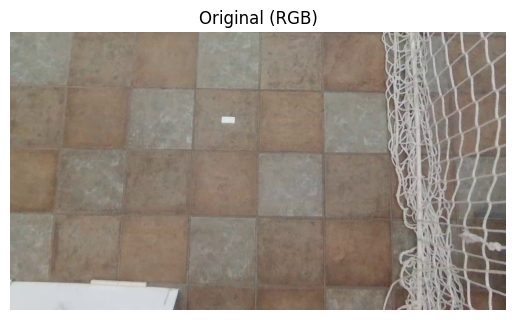

In [66]:
# ✅ Importar librerías y cargar imagen
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Ajuste para POSICION 1
# MISMA ruta que venimos usando (ajusta si cambió)
img_bgr_1 = cv2.imread(r"C:\Users\rrm21\Documents\Vision_en_Robotica\dron_images\p1.png")
if img_bgr_1 is None:
    raise FileNotFoundError("⚠️ No se pudo cargar la imagen. Verifica la ruta.")

img_rgb_1 = cv2.cvtColor(img_bgr_1, cv2.COLOR_BGR2RGB)
h, w = img_rgb_1.shape[:2]

plt.imshow(img_rgb_1); plt.title("Original (RGB)"); plt.axis("off"); plt.show()


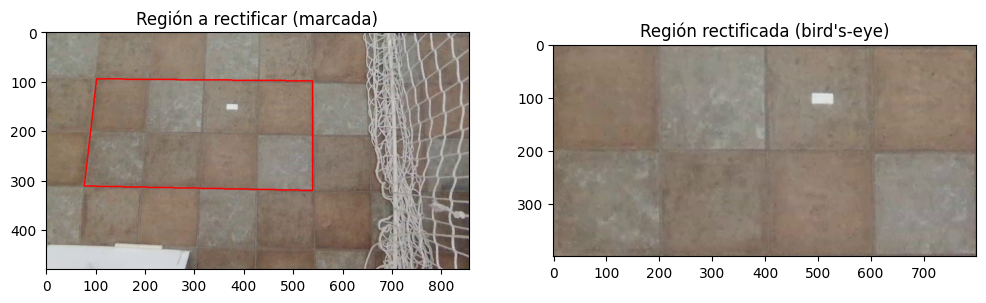

In [67]:
# Definir una región cuadrilátera interna (ajusta estos puntos si quieres otra zona)
# 4 squares x 2 squares
quad_src_1 = np.float32([ # [x,y]
    [int(0.12*w), int(0.20*h)], # Top Left corner 
    [int(0.63*w), int(0.21*h)], # Top Right corner
    [int(0.63*w), int(0.67*h)], # Bottom Right corner
    [int(0.09*w), int(0.65*h)], # Bottom Left corner
])

# Tamaño deseado del rectángulo de salida
out_W, out_H = 800, 400

# 4 squares x 3 squares
#quad_src = np.float32([ # [x,y]
#    [int(0.12*w), int(0.20*h)], # Top Left corner 
#    [int(0.63*w), int(0.21*h)], # Top Right corner
#    [int(0.63*w), int(0.67*h)], # Bottom Right corner
#    [int(0.09*w), int(0.65*h)], # Bottom Left corner
#])
## Tamaño deseado del rectángulo de salida
#out_W, out_H = 800, 600


quad_dst_1 = np.float32([
    [0, 0],
    [out_W-1, 0],
    [out_W-1, out_H-1],
    [0, out_H-1],
])

H_rect_1 = cv2.getPerspectiveTransform(quad_src_1, quad_dst_1)
rectified_1 = cv2.warpPerspective(img_rgb_1, H_rect_1, (out_W, out_H), flags=cv2.INTER_LINEAR,
                                borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

# Visualización
fig1 = plt.figure(figsize=(12,5))
ax1 = fig1.add_subplot(1,2,1)
ax1.imshow(img_rgb_1); ax1.set_title("Región a rectificar (marcada)"); ax1.axis("on")

# dibujar la región sobre la original
poly = quad_src_1.astype(int)
for i in range(4):
    p1 = tuple(poly[i])
    p2 = tuple(poly[(i+1)%4])
    cv2.line(img_rgb_1, p1, p2, (255,0,0), 2)  # ojo: img_rgb es RGB; dibujar con rojo puro
ax1.imshow(img_rgb_1)

ax2 = fig1.add_subplot(1,2,2)
ax2.imshow(rectified_1); ax2.set_title("Región rectificada (bird's-eye)"); ax2.axis("on")

plt.show()


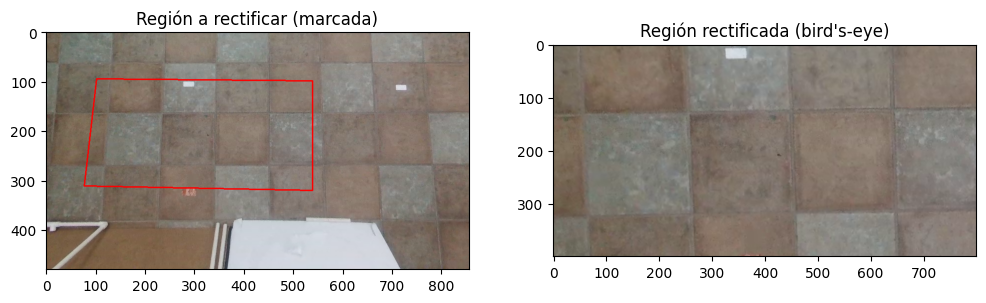

In [68]:
# Ajuste para POSICION 2
# MISMA ruta que venimos usando (ajusta si cambió)
img_bgr_2 = cv2.imread(r"C:\Users\rrm21\Documents\Vision_en_Robotica\dron_images\p2.png")
if img_bgr_2 is None:
    raise FileNotFoundError("⚠️ No se pudo cargar la imagen. Verifica la ruta.")

img_rgb_2 = cv2.cvtColor(img_bgr_2, cv2.COLOR_BGR2RGB)
h, w = img_rgb_2.shape[:2]

#plt.imshow(img_rgb_2); plt.title("Original (RGB)"); plt.axis("off"); plt.show()

# Definir una región cuadrilátera interna (ajusta estos puntos si quieres otra zona)
quad_src_2 = np.float32([ # [x,y]
    [int(0.12*w), int(0.20*h)], # Top Left corner 
    [int(0.63*w), int(0.21*h)], # Top Right corner
    [int(0.63*w), int(0.67*h)], # Bottom Right corner
    [int(0.09*w), int(0.65*h)], # Bottom Left corner
])

# Tamaño deseado del rectángulo de salida
out_W, out_H = 800, 400

quad_dst_2 = np.float32([
    [0, 0],
    [out_W-1, 0],
    [out_W-1, out_H-1],
    [0, out_H-1],
])

H_rect_2 = cv2.getPerspectiveTransform(quad_src_2, quad_dst_2)
rectified_2 = cv2.warpPerspective(img_rgb_2, H_rect_2, (out_W, out_H), flags=cv2.INTER_LINEAR,
                                borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

# Visualización
fig2 = plt.figure(figsize=(12,5))
ax1 = fig2.add_subplot(1,2,1)
ax1.imshow(img_rgb_2); ax1.set_title("Región a rectificar (marcada)"); ax1.axis("on")

# dibujar la región sobre la original
poly = quad_src_2.astype(int)
for i in range(4):
    p1 = tuple(poly[i])
    p2 = tuple(poly[(i+1)%4])
    cv2.line(img_rgb_2, p1, p2, (255,0,0), 2)  # ojo: img_rgb es RGB; dibujar con rojo puro
ax1.imshow(img_rgb_2)

ax2 = fig2.add_subplot(1,2,2)
ax2.imshow(rectified_2); ax2.set_title("Región rectificada (bird's-eye)"); ax2.axis("on")

plt.show()

Then we apply a traslation to match the images and expand the box to see it completely.


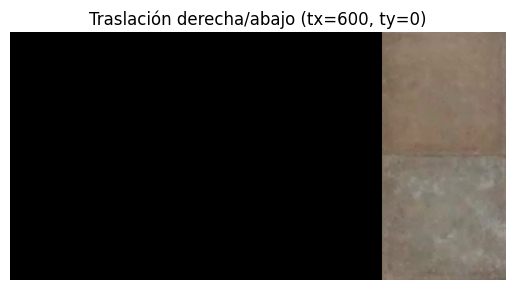

In [69]:
h, w = rectified_1.shape[:2]

tx, ty = 600, 0  # desplazar 600 px a la derecha, 0 px hacia abajo
M1 = np.float32([[1, 0, tx],
                 [0, 1, ty]])

shift_rd = cv2.warpAffine(rectified_1, M1, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

plt.imshow(shift_rd); plt.title(f"Traslación derecha/abajo (tx={tx}, ty={ty})"); plt.axis("off"); plt.show()


In [70]:
# ----------------------------
# 3. Calcular transformación proyectiva
# ----------------------------
# M = cv2.getPerspectiveTransform(pts_p2, pts_p1)
# H_rect_1 = cv2.getPerspectiveTransform(quad_src_1, quad_dst_1)

# Crear un lienzo grande
#canvas_h = p1.shape[0] * 2
#canvas_w = p1.shape[1] * 2
#p2_warped = cv2.warpPerspective(p2, M, (canvas_w, canvas_h))
#rectified_3 = cv2.warpPerspective(img_rgb_2, H_rect_2, (out_W, out_H))

canvas_h = rectified_1.shape[0] * 2
canvas_w = rectified_1.shape[1] * 2

# Creamos un lienzo grande
mosaic = np.zeros((canvas_h, canvas_w, 3), dtype=np.uint8)

# Pegamos la imagen base
mosaic[0:rectified_1.shape[0], 0:rectified_1.shape[1]] = rectified_1

# Encima colocamos la alineada
#mask = rectified_2 > 0
#mosaic[mask] = rectified_2[mask]



mosaic.imshow(mosaic);

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

✅ Mosaico guardado en: C:\Users\rrm21\Documents\Vision_en_Robotica\dron_images\mosaico_simple.png


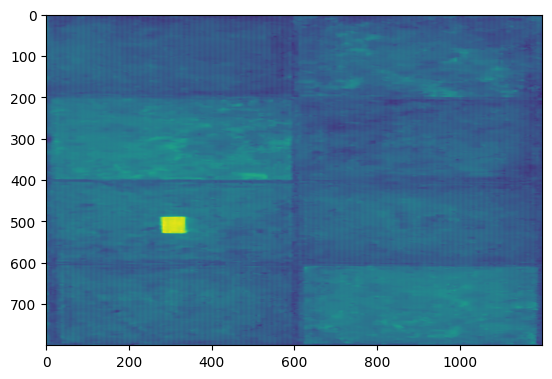

In [ ]:
#row1 = cv2.hconcat(rectified_1,rectified_2)
#row2 = cv2.hconcat(rectified_2,rectified_1)
#mosaic = cv2.vconcat(row1, row2)
#cv2.imshow('Mosaico', mosaic)
# Carpeta de imágenes
img_dir = r"C:\Users\rrm21\Documents\Vision_en_Robotica\dron_images"

#if rectified_1.shape[0] != rectified_2.shape[0]:
#    height = min(rectified_1.shape[0], rectified_2.shape[0])
#    rectified_1 = cv2.resize(rectified_1, (int(p1.shape[1]*height/rectified_1.shape[0]), height))
#    rectified_2 = cv2.resize(rectified_2, (int(rectified_2.shape[1]*height/rectified_2.shape[0]), height))

# Concatenar horizontalmente
row_1 = cv2.hconcat(rectified_1,rectified_2)
row_2 = cv2.hconcat(rectified_2,rectified_1)
mosaic = cv2.hconcat([row_1, row_2])
row_1.imshow();
row_2.imshow();

# Guardar resultado
output_path = os.path.join(img_dir, "mosaico_simple.png")
cv2.imwrite(output_path, mosaic)
print("✅ Mosaico guardado en:", output_path)

mosaic.imshow();


plt.show()

### Ejemplo 2 — Rectificación de un cuadrilátero interno (*bird's‑eye* de una región)

Seleccionamos un **cuadrilátero** dentro de la imagen (simulando un plano inclinado) y lo mapeamos a un **rectángulo** de salida.
Esto es análogo a **rectificar un plano** (p. ej., el piso o una hoja vista en perspectiva).